# Initialization


In [1]:
# import necessary modules
# uncomment to get plots displayed in notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
import math

font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
plt.rcParams["figure.figsize"] = [3.0,2.0]




import os 
# path_to_class_sz = os.getcwd() + '/../../'

In [4]:

common_settings = {
                   'mass function' : 'T08', 
                   'hm_consistency': 0,
                   # 'concentration parameter': 'D08',  # Duffy et al 2008 
}


# copied from : https://github.com/simonsobs/websky_model/blob/a93bbf758432a936c0ec2b59775683b695d3d191/websky_model/websky.py#L55
websky_Omega_M = 0.31
websky_Omega_B = 0.049
websky_Omega_L = 0.69
websky_h = 0.68
websky_sigma_8 = 0.81
websky_n_s = 0.965


websky_cosmo = {
    'omega_b': websky_Omega_B*websky_h**2.,
    'omega_cdm': (websky_Omega_M-websky_Omega_B)*websky_h**2.,
    'h': websky_h,
    'tau_reio': 0.0543,
    'sigma8': websky_sigma_8,
    'n_s': websky_n_s, 
    'use_websky_m200m_to_m200c_conversion': 1,
    
    'use_redshift_dependent_M_min': 0,
    # 'full_path_to_redshift_dependent_M_min':path_to_class_sz+'class_sz_auxiliary_files/websky_halo_mass_completion_z_Mmin_in_Msun_over_h.txt',
    #'M_min' : 1e10*websky_cosmo['h'], # not used
    'M_max' : 1e16*websky_h,
    'z_min' : 5e-3,
    'z_max' : 4.6,
}

tsz_params ={

       'pressure profile': 'B12',  # check source/input.c for default parameter values of Battaglia et al profile (B12)
       'units for tSZ spectrum': 'dimensionless',
       'n_k_pressure_profile' : 100,
       'n_m_pressure_profile' : 100,
       'n_z_pressure_profile' : 100,
       'x_outSZ': 4.,
       'truncate_gas_pressure_wrt_rvir':0,
       'pressure_profile_epsrel':1e-3,
       'pressure_profile_epsabs':1e-40,
        

}

# Compute

In [5]:
%%time 
M = Class()
M.set({'output':'tSZ_1h,tSZ_2h,tSZ_tSZ_tSZ_1h,tSZ_tSZ_tSZ_2h,tSZ_tSZ_tSZ_3h'})

M.set({
    
'dlogell' : 0.1, # increase to compute less ells for faster evaluation
'ell_max' : 10000.0,
'ell_min' : 2.0,    
'use_fft_for_profiles_transform' : 1, 
    
'bispectrum_lambda_2' :  1.,
'bispectrum_lambda_3' :  1.
})

M.set(common_settings)
M.set(websky_cosmo)
M.set(tsz_params)


M.compute()

CPU times: user 5min 37s, sys: 1.53 s, total: 5min 39s
Wall time: 39.7 s


In [6]:
cl_sz = M.cl_sz()
b_yyy = M.b_yyy()

## Plot

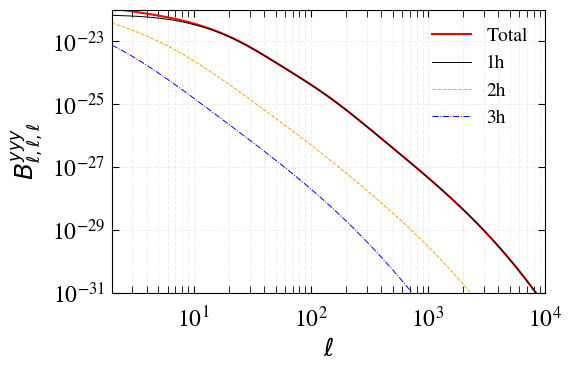

In [8]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(6,4))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')


ax.plot(b_yyy['ell'],np.asarray(b_yyy['1h'])+np.asarray(b_yyy['2h'])+np.asarray(b_yyy['3h']),label='Total',c='r')
ax.plot(b_yyy['ell'],np.asarray(b_yyy['1h']),label='1h',lw=0.7,ls='-',c='k')
ax.plot(b_yyy['ell'],np.asarray(b_yyy['2h']),label='2h',lw=0.7,ls='--',c='orange')
ax.plot(b_yyy['ell'],np.asarray(b_yyy['3h']),label='3h',lw=0.7,ls='-.',c='blue')

ax.set_xscale('log')
ax.set_yscale('log')


ax.set_xlabel(r'$\ell$',fontsize=18)
ax.set_ylabel(r'$B_{\ell,\ell,\ell}^{yyy}$',fontsize=18)
ax.legend(loc=1,ncol = 1,frameon=False,fontsize=14)

ax.set_xlim(2,1e4)
ax.set_ylim(1e-31,1e-22)

fig.tight_layout()
fig.tight_layout()


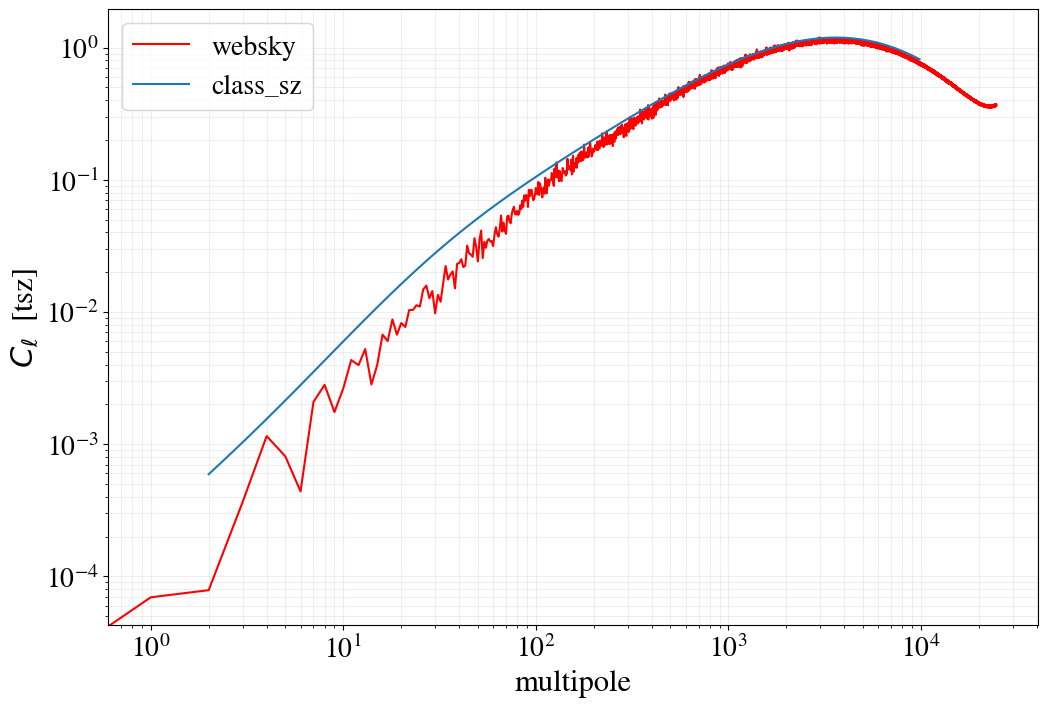

In [20]:
plt.figure(figsize=(12,8))
# file available at https://drive.google.com/file/d/14muHHtbY0mdixlvZJyLEC4i5XWDDbWgu/view?usp=sharing
ls_ws,dls_ws = np.loadtxt(path_to_class_sz+'class_sz_auxiliary_files/websky_april_8192.txt',unpack=True)

plt.loglog(ls_ws,dls_ws*1e12,c='r',label='websky')
plt.loglog(cl_sz['ell'],np.asarray(cl_sz['1h'])+np.asarray(cl_sz['2h']),label='class_sz')

# plt.grid(which='both',alpha=0.2)
plt.loglog()
# plt.xlim(20,2e4)
# plt.ylim(1,5e5)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('multipole',fontsize=22)
plt.ylabel(r'$C_\ell$  [tsz]',fontsize=22)
# plt.title('353x353')
plt.grid(which='both',alpha=0.2)
plt.legend(fontsize=20)